<a href="https://colab.research.google.com/github/RidhaAnsar/Pima-Indians-Diabetes-DataAnalysis-Project/blob/main/DataAnalyticsUsingPython_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pima Indians Diabetes Database**

The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("drive/MyDrive/pythonproject/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(data['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


**DATA** **VISUALIZATION**



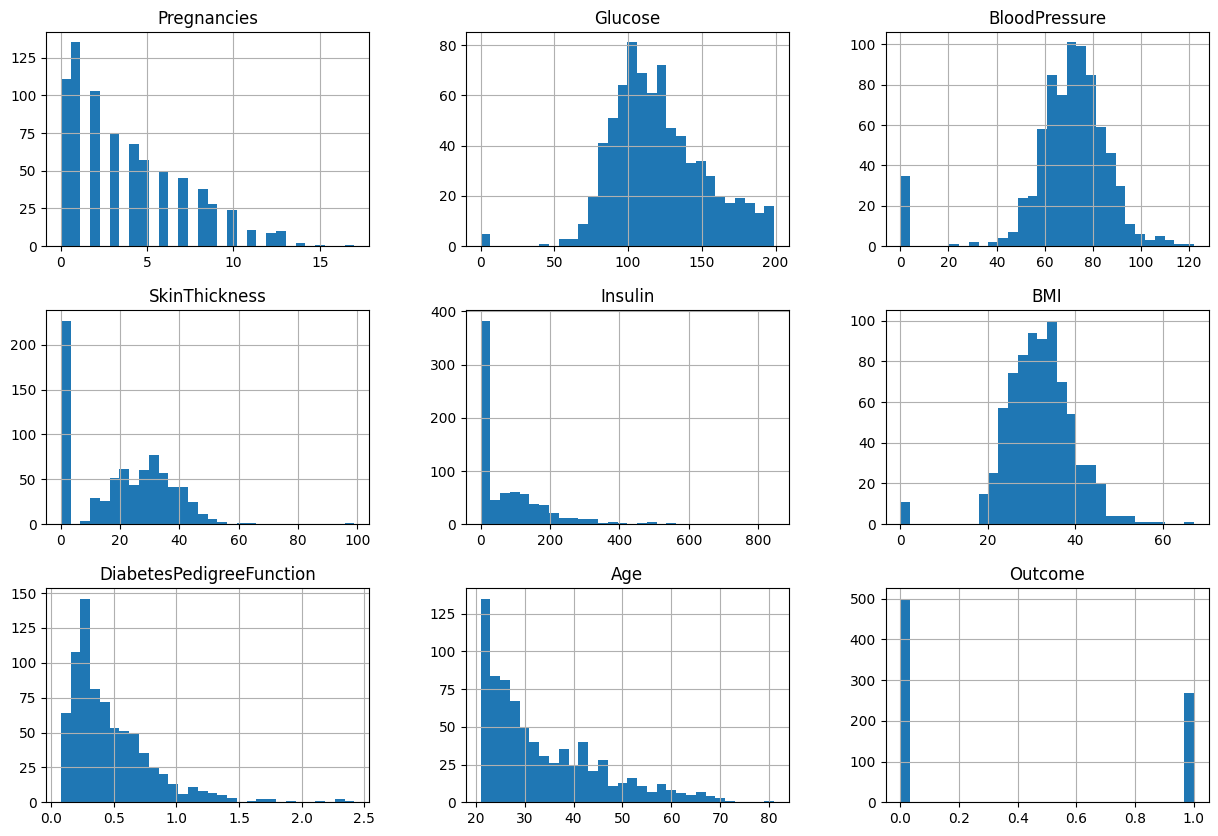

In [7]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [8]:
# data analysis of patients of age above 50
over_50=data[data["Age"]>50];
over_50.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


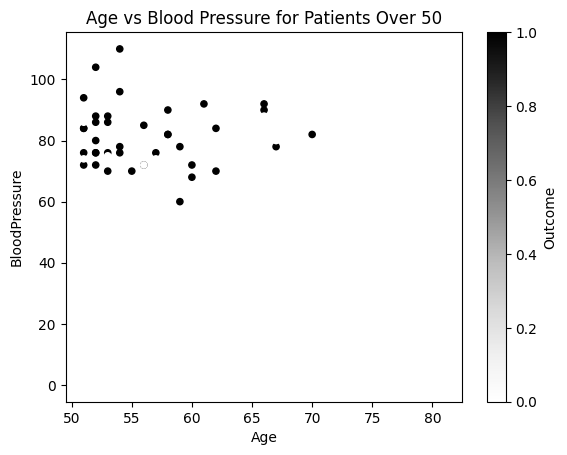

In [9]:
over_50.plot(kind='scatter',
             x='Age',
             y='BloodPressure',
             c='Outcome')
plt.title('Age vs Blood Pressure for Patients Over 50')
plt.show()

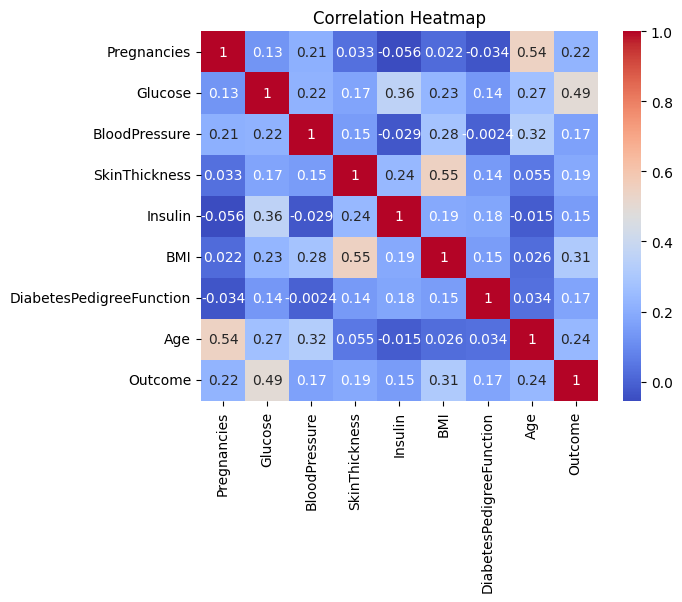

In [14]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Check for missing or zero values in relevant columns
print((data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


**DATA PREPROCESSING**

In [15]:
# Replace 0 values with the median for relevant columns
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column].replace(0, data[column].median(), inplace=True)


In [16]:
from sklearn.preprocessing import StandardScaler
# standardizing the features
scaler=StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])
data_scaled['Outcome']=data['Outcome']


In [37]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

#splitting the data into train and test set
x = data_scaled.drop(['Outcome','Insulin' ], axis=1)
y=data_scaled['Outcome']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# model building
model=LogisticRegression()
model.fit(x_train, y_train)

# prediction
y_preds=model.predict(x_test)

# model evaluation
print(f'Accuracy: {accuracy_score(y_test, y_preds)}')
print(f'f1_score:{f1_score(y_test, y_preds)}')
print(classification_report(y_test, y_preds))

Accuracy: 0.7532467532467533
f1_score:0.6415094339622642
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')


Cross-Validation Scores: [0.76623377 0.74675325 0.78571429 0.79738562 0.75816993]
Mean Cross-Validation Score: 0.7708513708513708


In [38]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

#predicting the model
y_preds2=rf.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_preds2)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_preds2))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(x_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(x_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

